In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from network import *

In [3]:
from collections import Counter
import math
from scipy.stats import power_divergence


In [4]:
def plot_xy_line(x, y):
    plt.plot(x, y)
    plt.show()

In [5]:
def plot_xy_dot(x, y):
    plt.plot(x, y, '.', markersize=2)
    plt.show()

In [6]:
def plot_xy_point(x, y):
    plt.plot(x, y, 'o', markersize=3, alpha=0.5)
    plt.show()

In [7]:
def convert(data, do):
    if do:
        return [math.log(x + 1) for x in data]
    else:
        return data

In [8]:
def plot_pairs(pairs, plot_foo, log = False):
    val = [x[1] for x in pairs]
    plot_foo([x[0] for x in pairs], convert(val, log) )
    print(power_divergence(val))

In [9]:
def plor_rank(y, plot_foo, log = False):
    val = list(range(0,len(y)))
    plot_foo(val, convert(y, log) )
    print(power_divergence(y))

In [10]:
def plot_dict(stat, plot_foo, log = False):
    plot_foo([x for x in stat.keys()], convert([x for x in stat.values()], log) )


In [11]:
def plot_labels(xlabel, ylabel, title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [12]:
coauthorNetwork = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file);


Uniq authors: 184962


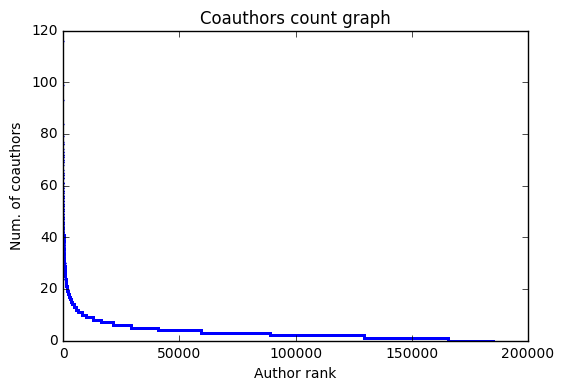

Power_divergenceResult(statistic=863503.34952257446, pvalue=0.0)


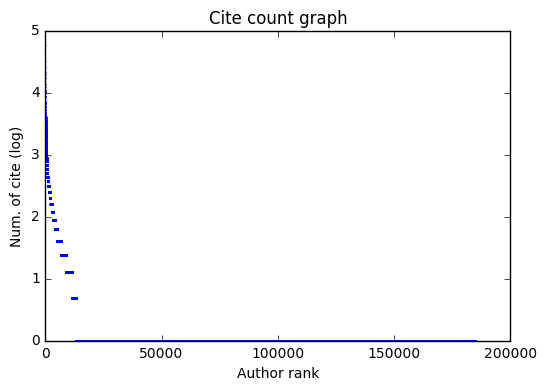

Power_divergenceResult(statistic=2032229.3321416411, pvalue=0.0)


In [13]:
def neighbour_rank(graph, log = False):
    vals = sorted([len(graph.neighbors(author)) for author in graph.nodes()], reverse=True)
    plor_rank(vals, plot_xy_dot, log=log)

plot_labels("Author rank", "Num. of coauthors", "Coauthors count graph")
neighbour_rank(coauthorNetwork.gr)

plot_labels("Author rank", "Num. of cite (log)", "Cite count graph")
neighbour_rank(coauthorNetwork.cgr, log=True)

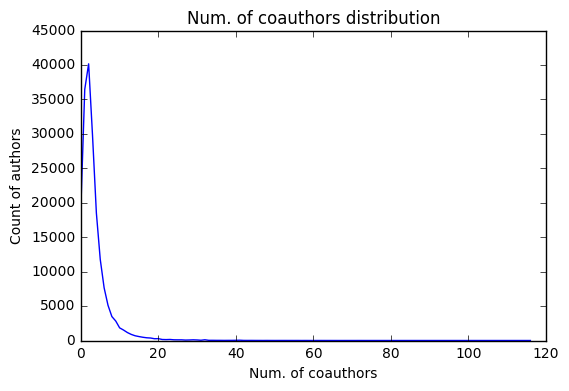

Power_divergenceResult(statistic=1889406.3653939727, pvalue=0.0)


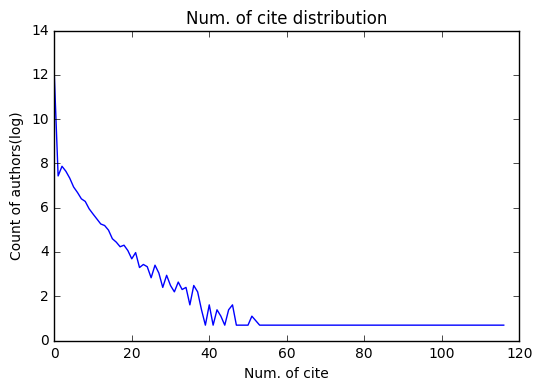

Power_divergenceResult(statistic=9726014.0103156324, pvalue=0.0)


In [14]:
def neighbour_dist(graph, log = False):
    d = sorted(Counter([len(graph.neighbors(author)) for author in graph.nodes()]).items(), reverse=True)
    plot_pairs(d, plot_xy_line, log)

plot_labels("Num. of coauthors", "Count of authors", "Num. of coauthors distribution")
neighbour_dist(coauthorNetwork.gr)

plot_labels("Num. of cite", "Count of authors(log)", "Num. of cite distribution")
neighbour_dist(coauthorNetwork.cgr, log=True)


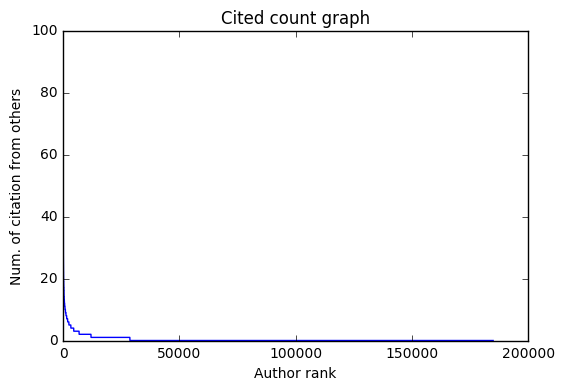

Power_divergenceResult(statistic=1495968.6339802516, pvalue=0.0)


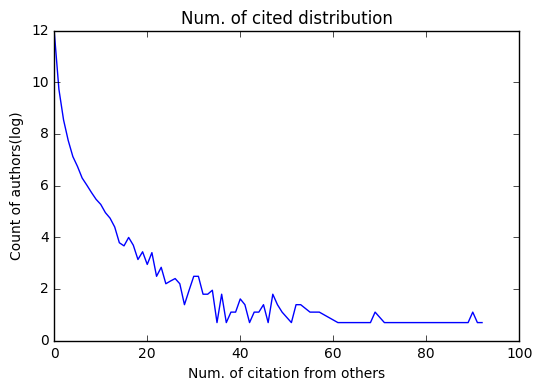

Power_divergenceResult(statistic=8908126.0824385546, pvalue=0.0)


In [15]:
def in_degree_rank(graph, log=False):
    vals = sorted([graph.in_degree(author) for author in graph.nodes()], reverse=True)
    plor_rank(vals, plot_xy_line,log=log)

def in_degree_dist(graph, log=False):
    d = sorted(Counter([graph.in_degree(author) for author in graph.nodes()]).items(), reverse=True)
    plot_pairs(d, plot_xy_line, log=log)
    

plot_labels("Author rank", "Num. of citation from others", "Cited count graph")
in_degree_rank(coauthorNetwork.cgr)

plot_labels("Num. of citation from others", "Count of authors(log)", "Num. of cited distribution")
in_degree_dist(coauthorNetwork.cgr,log=True)


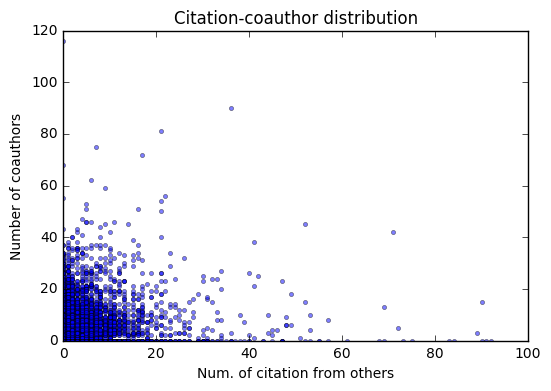

Power_divergenceResult(statistic=2032229.3321416411, pvalue=0.0)


In [16]:
def coauth_cite_plot(network):
    p = [(network.cgr.in_degree(author), len(network.cgr.neighbors(author)))
     for author in network.author_to_article.keys()]
    plot_pairs(p, plot_xy_point)

plot_labels("Num. of citation from others", "Number of coauthors", "Citation-coauthor distribution")
coauth_cite_plot(coauthorNetwork)

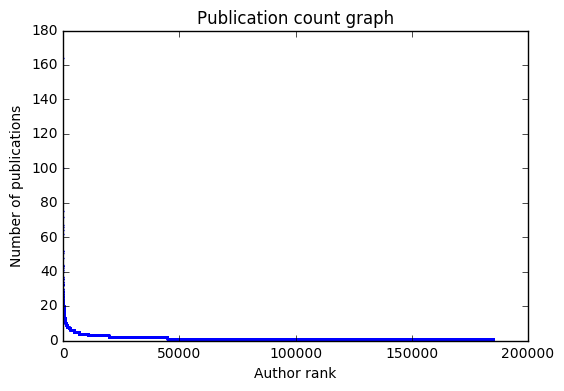

Power_divergenceResult(statistic=346237.65926948184, pvalue=0.0)


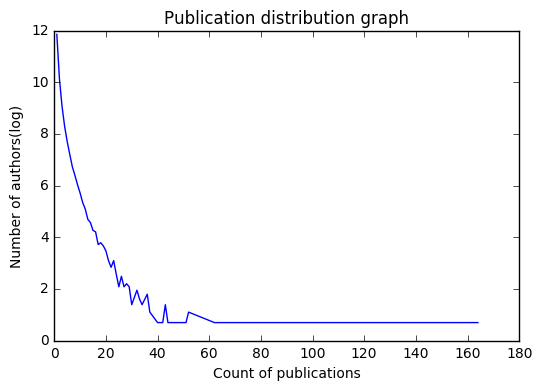

Power_divergenceResult(statistic=5430262.496447918, pvalue=0.0)


In [17]:
def pub_rank(network, log = False):
    r = sorted([len(x) for x in network.author_to_article.values()], reverse=True)
    plor_rank(r, plot_xy_dot, log = log)

def pub_dist(network, log = False):
    r = sorted(Counter([len(x) for x in network.author_to_article.values()]).items(), reverse=True)
    plot_pairs(r, plot_xy_line, log = log)
    
plot_labels("Author rank", "Number of publications", "Publication count graph")
pub_rank(coauthorNetwork)


plot_labels("Count of publications", "Number of authors(log)", "Publication distribution graph")
pub_dist(coauthorNetwork, log = True)

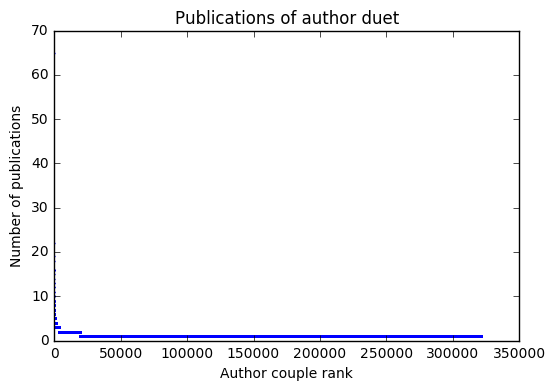

Power_divergenceResult(statistic=43916.76878495932, pvalue=1.0)


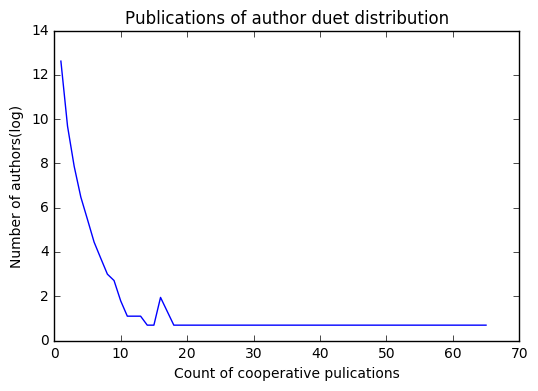

Power_divergenceResult(statistic=5356587.0955195241, pvalue=0.0)


In [18]:
def coathorship_rank(network, log = False):
    r = sorted([x for x in network.coauth_count.values()], reverse=True)
    plor_rank(r, plot_xy_dot, log=log)
    
def coathorship_dist(network, log = False):
    r = sorted(Counter([x for x in network.coauth_count.values()]).items(), reverse=True)
    plot_pairs(r, plot_xy_line, log=log)
    
plot_labels("Author couple rank", "Number of publications", "Publications of author duet")
coathorship_rank(coauthorNetwork)


plot_labels("Count of cooperative pulications", "Number of authors(log)", "Publications of author duet distribution")
coathorship_dist(coauthorNetwork, log = True)
    

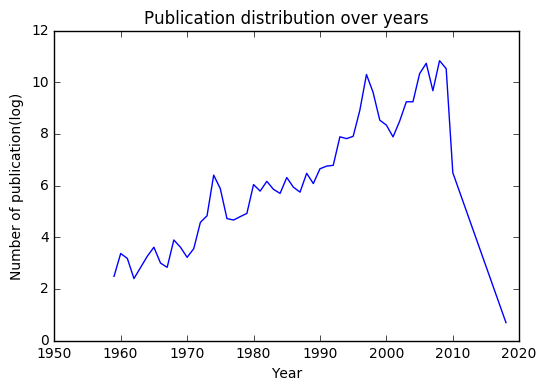

Power_divergenceResult(statistic=1290456.0971932057, pvalue=0.0)


In [19]:
def publication_year_dist(network, log=False):
    p = []
    for x in network.author_year.values():
        for y in x:
            if y > 1000:
                p.append(y)
    p = sorted(Counter(p).items(), key= lambda x: x[0], reverse=False)
    
    plot_pairs(p, plot_xy_line, log=log)

plot_labels("Year", "Number of publication(log)", "Publication distribution over years")

publication_year_dist(coauthorNetwork, log=True)

Uniq authors: 184961
coauth: [(0, 8923), (1, 35815), (2, 35003), (3, 24682), (4, 12279), (5, 5128), (6, 2187), (7, 949), (8, 475), (9, 244)]
cite: [(0, 156265), (2, 28696)]


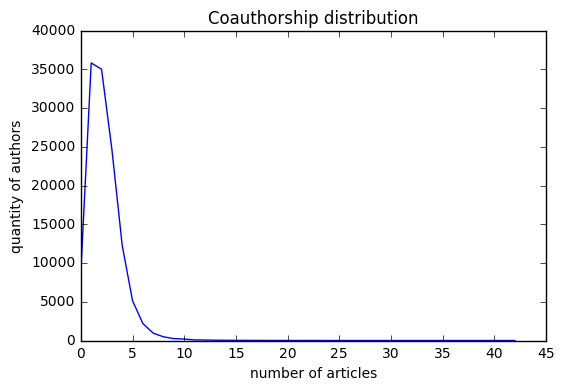

Power_divergenceResult(statistic=704391.62190056453, pvalue=0.0)


In [20]:
def plot_coauthor_dist(start, end):
    coauthor_network = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file, lambda article: start <= article.year < end)
    dist = coauthor_network.calc_coauthor_cite_distribution()
    plot_labels("number of articles", "quantity of authors", "Coauthorship distribution")
    plot_pairs(dist[0], plot_xy_line, False)
    

plot_coauthor_dist(1890, 2100)
    


Uniq authors: 184961
coauth: [(0, 8923), (1, 35815), (2, 35003), (3, 24682), (4, 12279), (5, 5128), (6, 2187), (7, 949), (8, 475), (9, 244)]
cite: [(0, 156265), (2, 28696)]


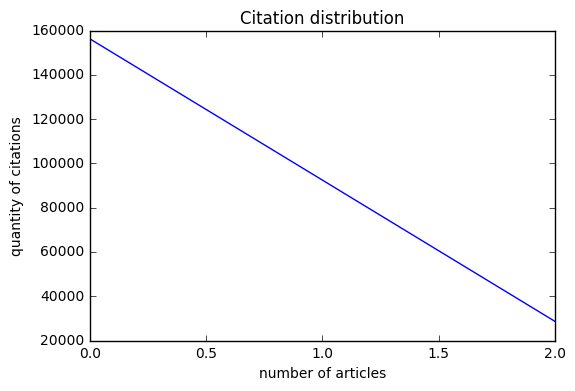

Power_divergenceResult(statistic=87985.303718081108, pvalue=0.0)


In [21]:
def plot_cite_dist(start, end):
    coauthor_network = CoauthorNetwork.load_with_loader("./data/out_test.txt", parse_dataset_file, lambda article: start <= article.year < end)
    dist = coauthor_network.calc_coauthor_cite_distribution()
    plot_labels("number of articles", "quantity of citations", "Citation distribution")
    plot_pairs(dist[1], plot_xy_line, False)
    

plot_cite_dist(1890, 2100)
    
    